In [1]:
# 4. Sobel Filtering

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "pictures/CT.png"

image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

output1 = image.copy()
output2 = image.copy()

Sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

(h, w) = image.shape

for i in range(h - 2):
    for j in range(w - 2):
        Gx = abs(np.sum(image[i:i+3, j:j+3] * Sx))
        Gy = abs(np.sum(image[i:i+3, j:j+3] * Sy))

        output1[i+1][j+1] = np.uint8(Gx)
        output2[i+1][j+1] = np.uint8(Gy)

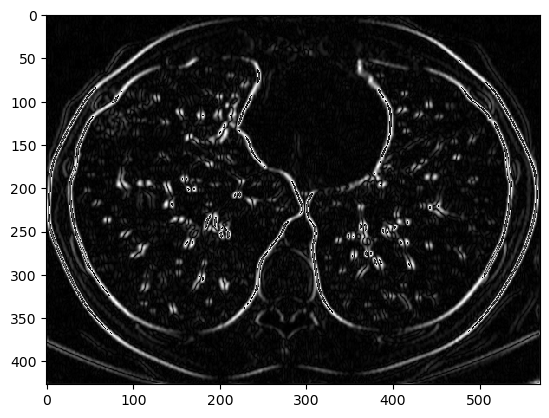

In [2]:
plt.imshow(output1, 'gray')

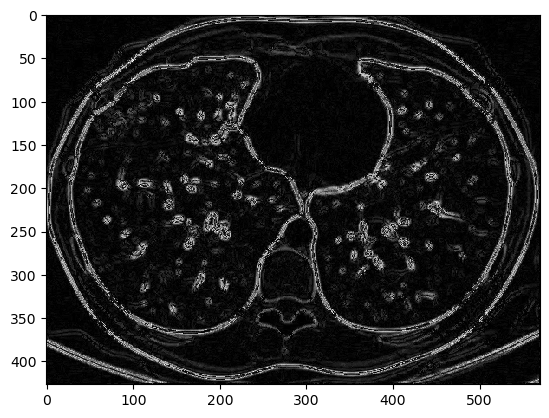

In [16]:
output3 = image.copy()
for i in range(h):
    for j in range(w):
        output3[i][j] = np.uint8((output1[i][j]^2 + output2[i][j]^2)*0.5)

plt.imshow(output3, cmap='gray', vmin=0, vmax=160)